In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [17]:
# change to your own data folder
directory = '../dataset/'
tesla = pd.read_csv(directory+'TSLA.csv')
tesla = tesla[['Date','Open','High','Low','Close']]
print(tesla.shape)
tesla.head()

(253, 5)


,Date,Open,High,Low,Close
0,2020-01-02,84.900002,86.139999,84.342003,86.052002
1,2020-01-03,88.099998,90.800003,87.384003,88.601997
2,2020-01-06,88.094002,90.311996,88.000000,90.307999
3,2020-01-07,92.279999,94.325996,90.671997,93.811996
4,2020-01-08,94.739998,99.697998,93.646004,98.428001


In [19]:
tesla_2011 = pd.read_csv(directory+'TSLA2011.csv')
tesla_2011 = tesla_2011[['Date','Open','High','Low','Close']]
print(tesla_2011.shape)
tesla_2011

(2264, 5)


,Date,Open,High,Low,Close
0,2011-01-03,5.368000,5.400000,5.180000,5.324000
1,2011-01-04,5.332000,5.390000,5.204000,5.334000
2,2011-01-05,5.296000,5.380000,5.238000,5.366000
3,2011-01-06,5.366000,5.600000,5.362000,5.576000
4,2011-01-07,5.600000,5.716000,5.580000,5.648000
...,...,...,...,...,...
2259,2019-12-24,83.671997,85.094002,82.538002,85.050003
2260,2019-12-26,85.582001,86.695999,85.269997,86.188004
2261,2019-12-27,87.000000,87.061996,85.222000,86.075996
2262,2019-12-30,85.758003,85.800003,81.851997,82.940002


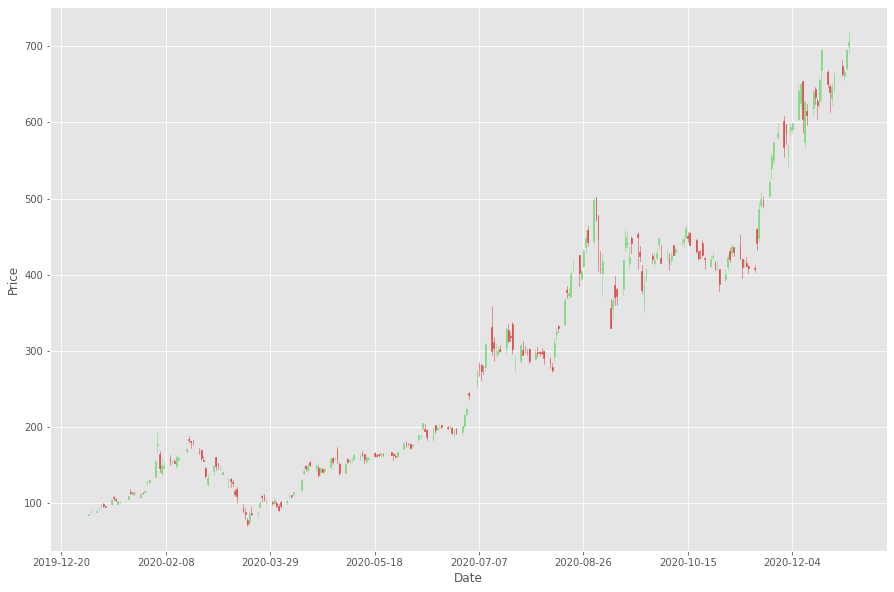

In [20]:
import matplotlib.ticker as mticker
# deprecated   # from matplotlib.finance import candlestick_ohlc
# change to import mplfinance
from mplfinance.original_flavor import candlestick_ohlc

from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df_cp = tesla.copy()
df_cp.Date = date2num(pd.to_datetime(tesla.Date).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,df_cp.values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=1)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

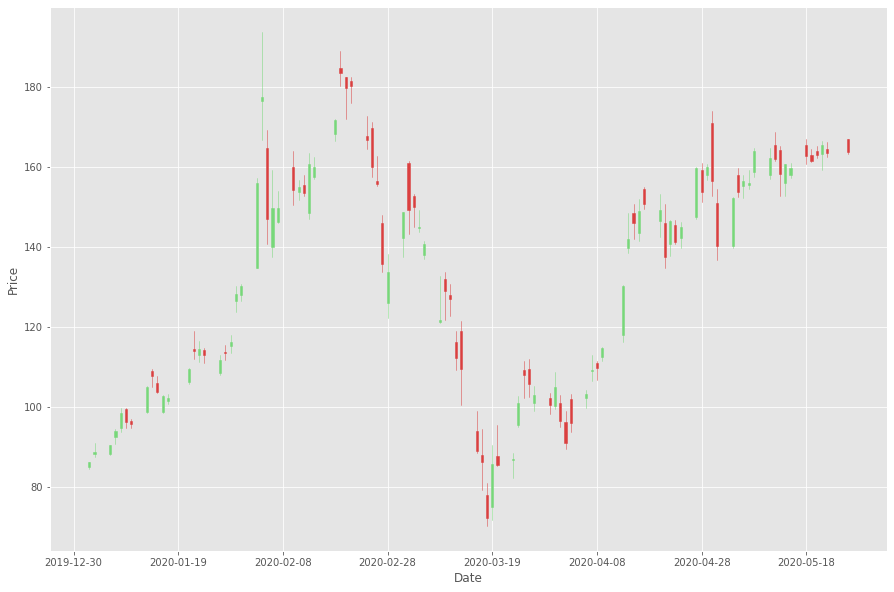

In [21]:
ax1 = plt.subplot2grid((1,1), (0,0))
ret=candlestick_ohlc(ax1,df_cp.iloc[:100,:].values, width=0.4, colorup='#77d879', colordown='#db3f3f',alpha=1)
x_range = np.arange(df_cp.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

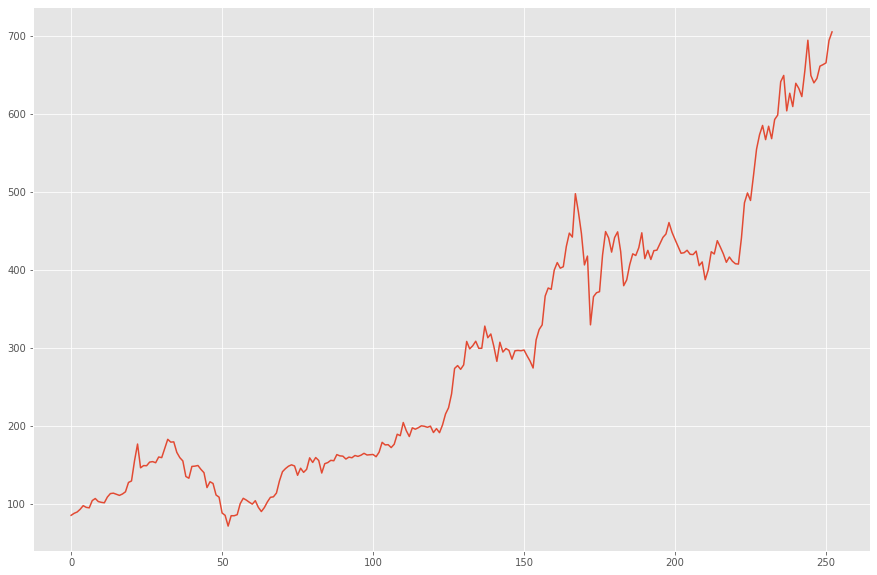

In [22]:
tesla.Close.plot()

<AxesSubplot:>

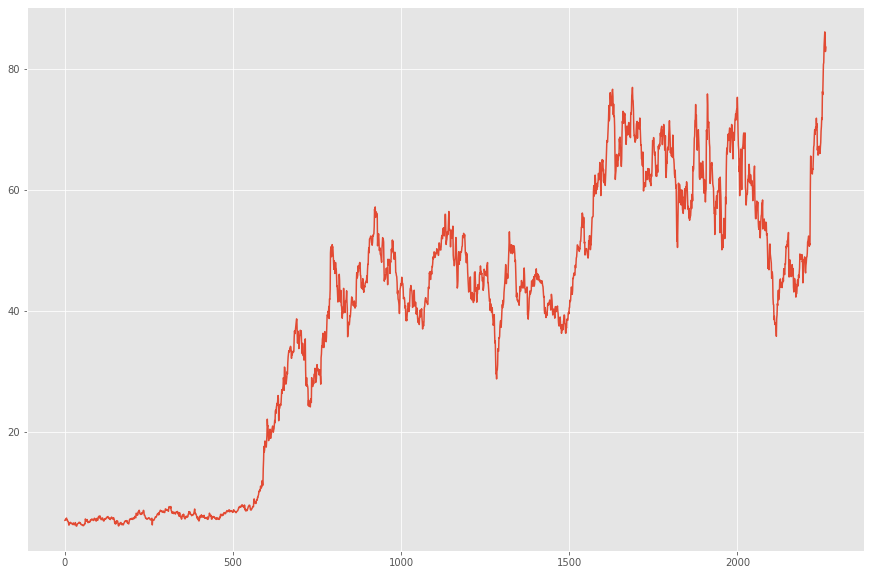

In [23]:
tesla_2011.Close.plot()

<AxesSubplot:>

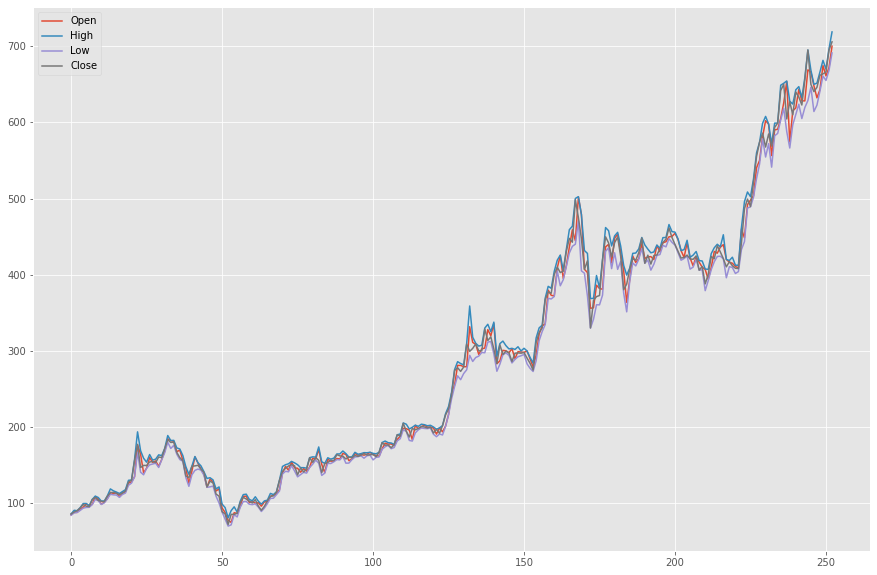

In [24]:
tesla.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

<AxesSubplot:>

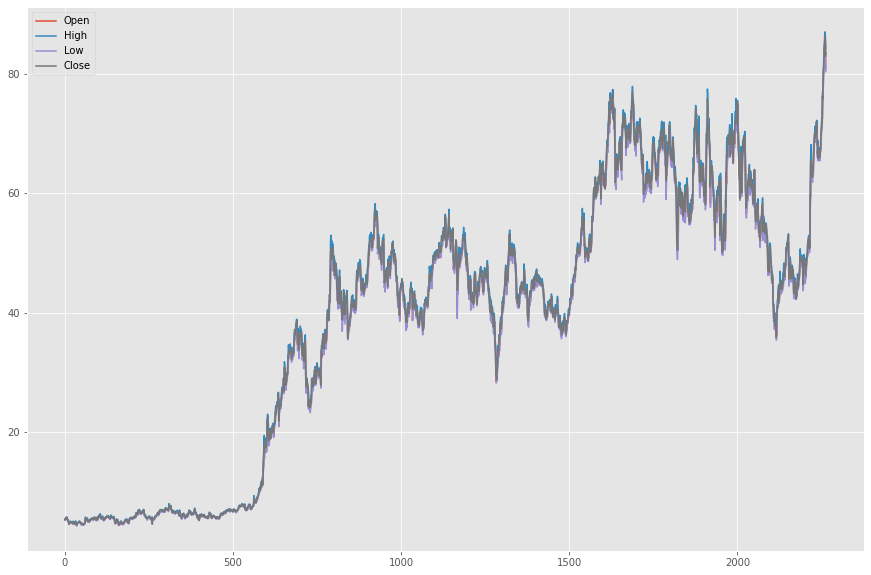

In [25]:
tesla_2011.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])

In [26]:
tesla_2011['months'] = pd.DatetimeIndex(tesla_2011['Date']).month
tesla_2011['year'] = pd.DatetimeIndex(tesla_2011['Date']).year
tesla_2011.head()

,Date,Open,High,Low,Close,months,year
0,2011-01-03,5.368,5.400,5.180,5.324,1,2011
1,2011-01-04,5.332,5.390,5.204,5.334,1,2011
2,2011-01-05,5.296,5.380,5.238,5.366,1,2011
3,2011-01-06,5.366,5.600,5.362,5.576,1,2011
4,2011-01-07,5.600,5.716,5.580,5.648,1,2011


In [38]:
teslaPivot = pd.pivot_table(tesla_2011, values = "Close", 
                            columns = "year", index = "months")

In [35]:
teslaPivot

mean                                                        \
year        2011      2012       2013       2014       2015       2016   
months                                                                   
1       5.128600  5.498000   7.037714  32.810381  40.651100  40.912421   
2       4.666737  6.552400   7.473263  41.204631  42.134631  33.934000   
3       4.741739  7.048182   7.408600  46.629333  38.943636  43.229454   
4       5.233200  6.699000   9.247091  41.657524  42.322287  50.191810   
5       5.522571  6.154727  16.279818  39.934857  48.444100  43.326762   
6       5.576818  6.124667  20.096100  43.931714  51.400363  42.967818   
7       5.682800  6.208381  24.631000  44.649182  53.319909  44.675800   
8       4.963913  5.808956  30.081364  51.117524  48.910095  44.746870   
9       4.921905  5.860842  34.794500  52.982190  50.581239  40.451238   
10      5.499714  5.668667  34.937478  47.876348  44.396546  40.336667   
11      6.416000  6.346571  27.451300  49.316632  44.176400  37.831524   
12      5.996000  6.835100  28.962000  43.732273  46.034364  40.110571   

                                         
year         2017       2018       2019  
months                                   
1       47.864100  67.716666  63.698857  
2       52.742211  67.155474  61.545684  
3       51.631304  63.196666  55.551428  
4       60.951684  57.954571  53.331143  
5       63.304818  57.970455  43.943091  
6       73.160727  67.120095  42.743300  
7       65.761000  62.394952  48.476455  
8       70.175044  66.242869  45.020545  
9       71.571400  58.029579  47.452300  
10      68.936636  56.998609  53.270956  
11      62.038381  68.899047  67.660000  
12      64.568200  68.821895  75.538952

Text(0.5, 1.0, 'TSLA monthly average')

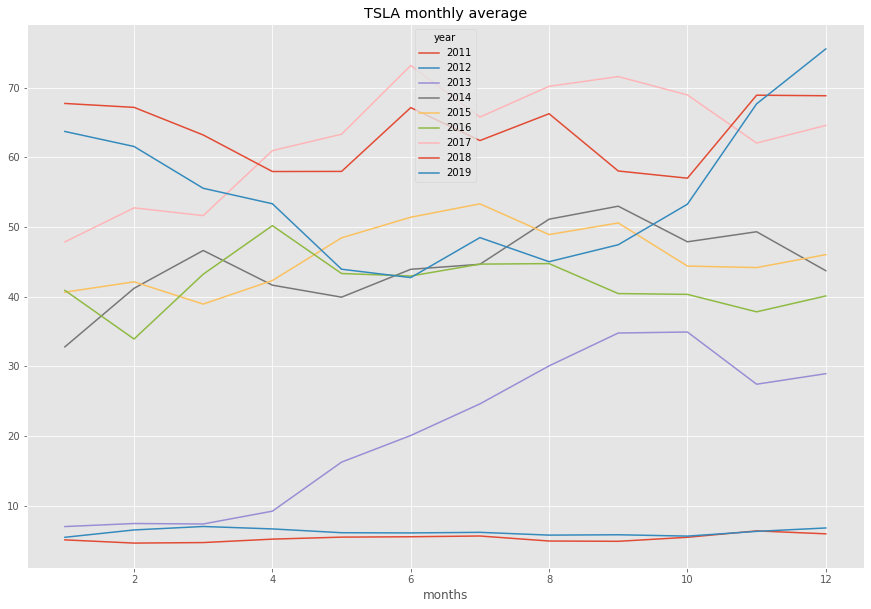

In [41]:
teslaPivot.plot()
plt.title('TSLA monthly average')

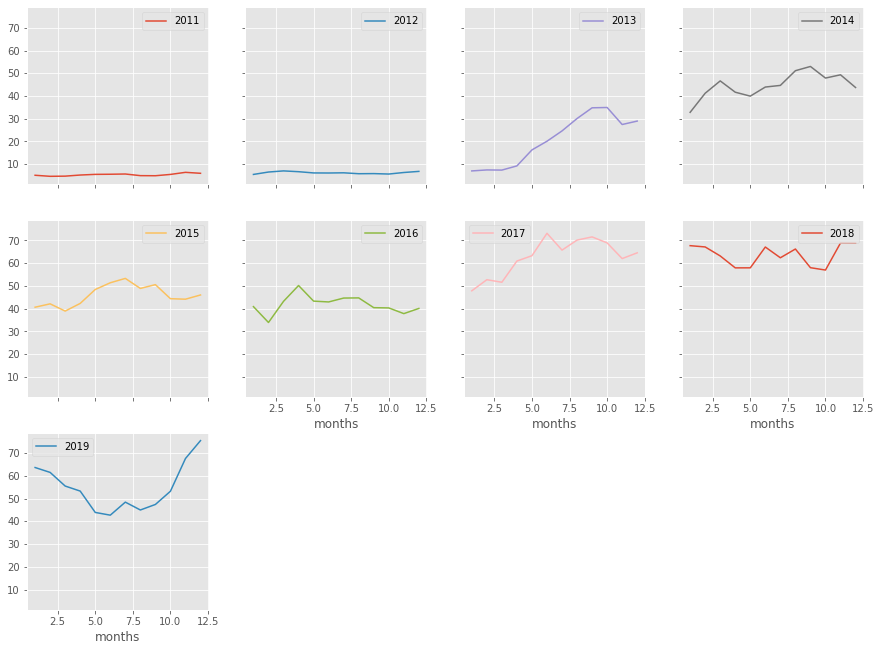

In [43]:
teslaPivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)
plt.show()

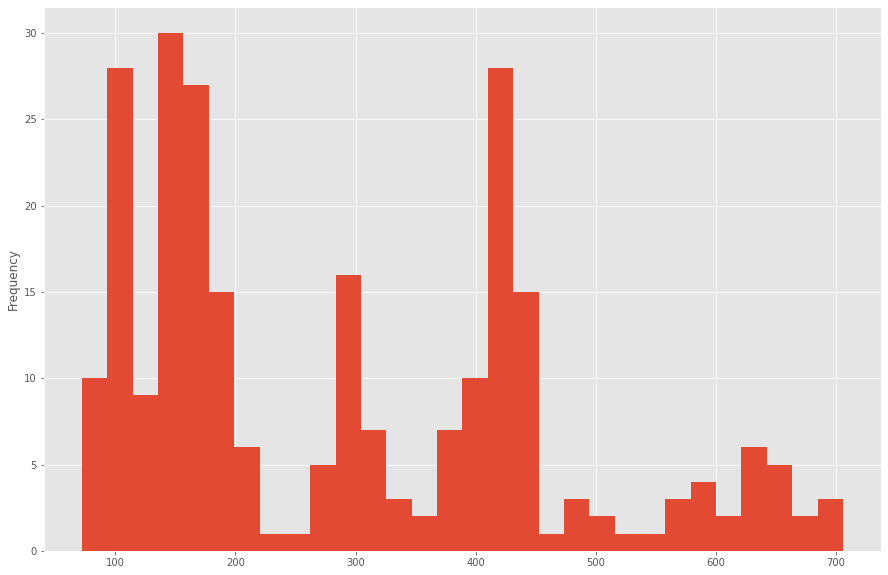

In [45]:
tesla.Close.plot(kind = "hist", bins = 30)
plt.show()

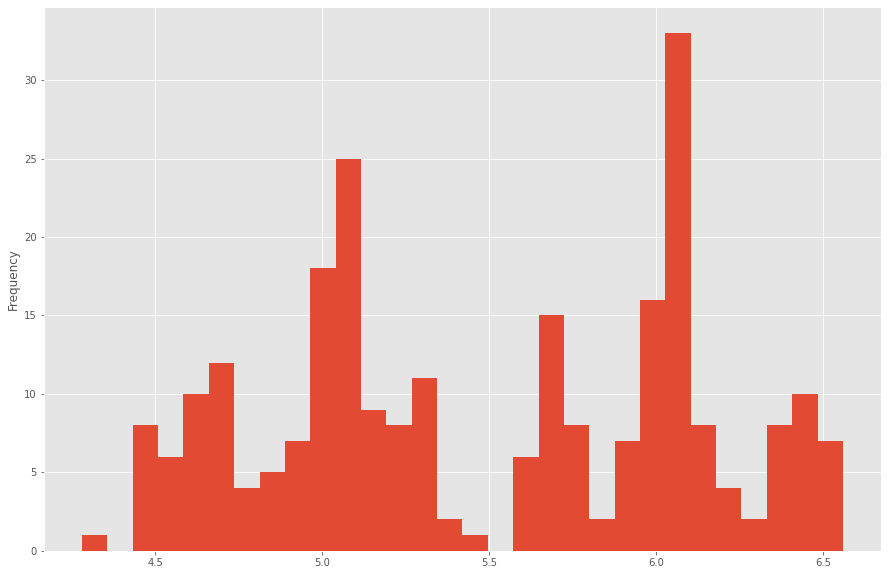

In [46]:
tesla['Closelog'] = np.log(tesla.Close)
tesla.Closelog.plot(kind = "hist", bins = 30)
plt.show()

<AxesSubplot:>

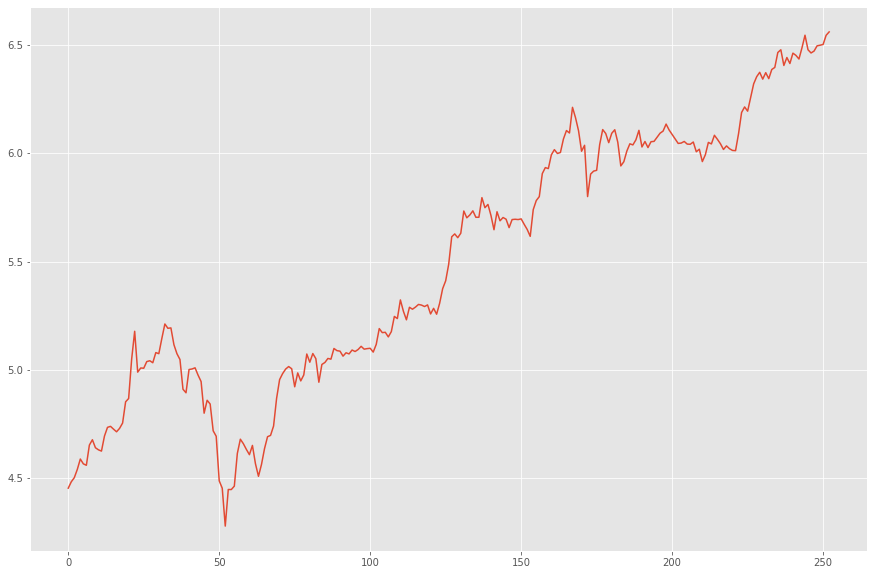

In [47]:
tesla.Closelog.plot()

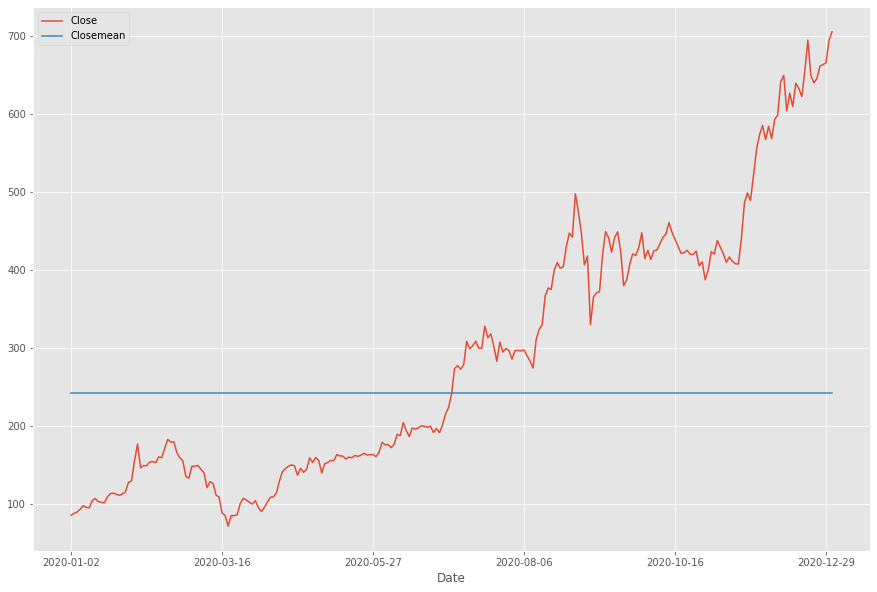

In [51]:
model_mean_pred = tesla.Closelog.mean()
# reverse log e
tesla["Closemean"] = np.exp(model_mean_pred)
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean"])
plt.show()

In [49]:
from sklearn import linear_model
x = np.arange(tesla.shape[0]).reshape((-1,1))
y = tesla.Close.values.reshape((-1,1))
reg = linear_model.LinearRegression()
pred = reg.fit(x, y).predict(x)

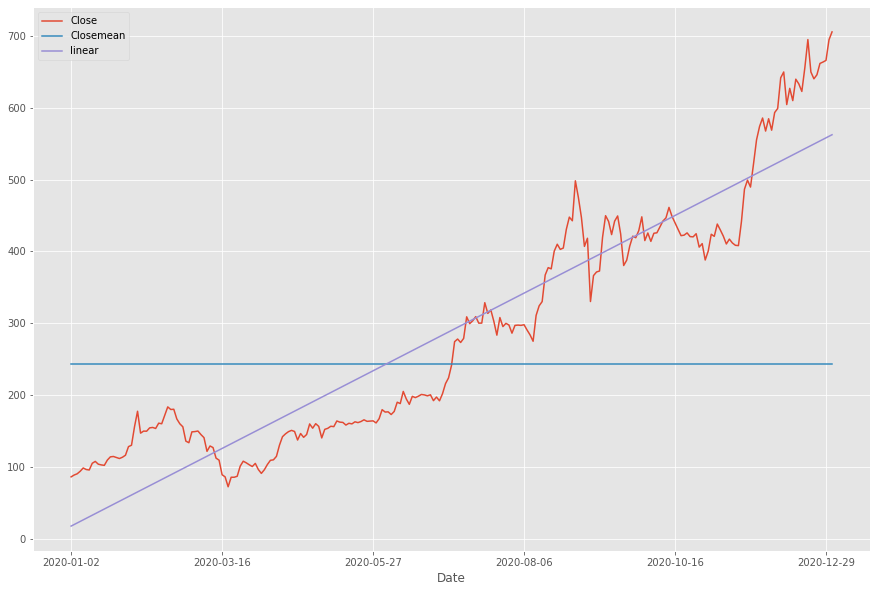

In [52]:
tesla['linear'] = pred
tesla.plot(kind="line", x="Date", y = ["Close", "Closemean", "linear"])
plt.show()

In [55]:
tesla.reset_index(drop=True)

,Date,Open,High,Low,Close,Closelog,Closemean,linear
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040
...,...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,6.494918,242.680088,553.840094
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,6.497815,242.680088,556.002742
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,6.501275,242.680088,558.165389
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,6.543595,242.680088,560.328037


In [137]:

tesla.Date = pd.DatetimeIndex(tesla.Date)
tesla.index = pd.PeriodIndex(tesla.Date, freq='D')
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin,CloselogShift1,CloselogDiff,CloseRandom,CloselogMA12,CloselogExp12,CloseExp12
Date,,,,,,,,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843,88.751706,NaN,NaN,NaN,NaN,4.454952,86.052002
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354,89.242157,4.454952,0.029203,86.052002,NaN,4.471639,87.500018
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886,90.729833,4.484154,0.019072,88.601997,NaN,4.485298,88.703403
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397,91.231216,4.503226,0.038067,90.307999,NaN,4.505776,90.538596
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908,91.735369,4.541293,0.048033,93.811996,NaN,4.533162,93.052362


In [60]:
tesla['timeIndex']= tesla.Date - tesla.Date.min()
tesla["timeIndex"] =tesla["timeIndex"] / np.timedelta64(1, 'D')
tesla["timeIndex"] = tesla["timeIndex"].round(0).astype(int)
tesla

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex
Date,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0.0
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1.0
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4.0
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5.0
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6.0


In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [67]:
model_linear = smf.ols('Closelog ~ timeIndex', data = tesla).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Closelog   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2369.
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          7.55e-130
Time:                        06:06:26   Log-Likelihood:                 63.217
No. Observations:                 253   AIC:                            -122.4
Df Residuals:                     251   BIC:                            -115.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4858      0.024    188.127      0.000       4.439       4.533
timeIndex      0.0055      0.000     48.676      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.716   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.563
Skew:                          -0.128   Prob(JB):                        0.278
Kurtosis:                       3.421   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model_linear.params

Intercept    4.485843
timeIndex    0.005511
dtype: float64

In [69]:
model_linear_pred = model_linear.predict()
model_linear_pred.shape

(253,)

In [70]:
tesla['linear_stats'] = model_linear_pred
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats
Date,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908


<AxesSubplot:xlabel='timeIndex'>

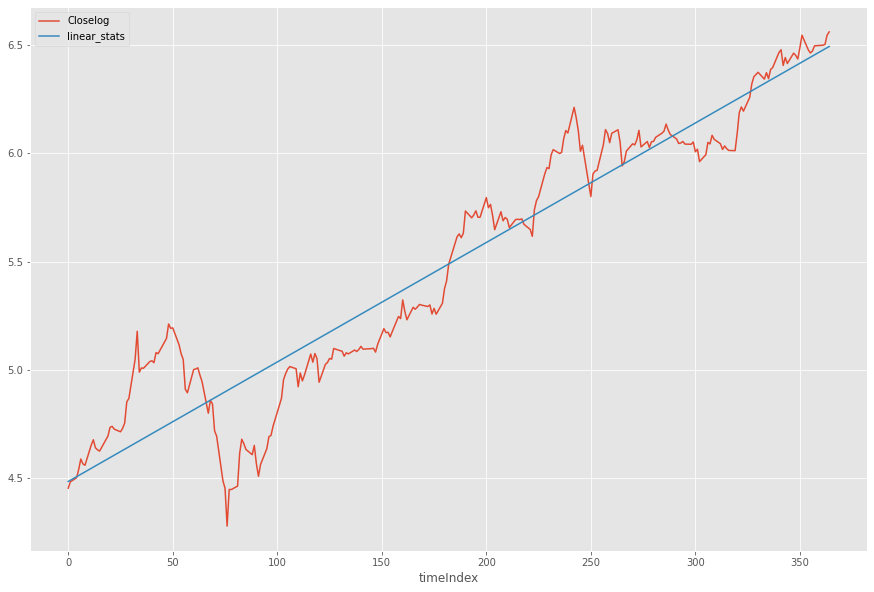

In [71]:
tesla.plot(kind="line", x="timeIndex", y = ["Closelog", 'linear_stats'])

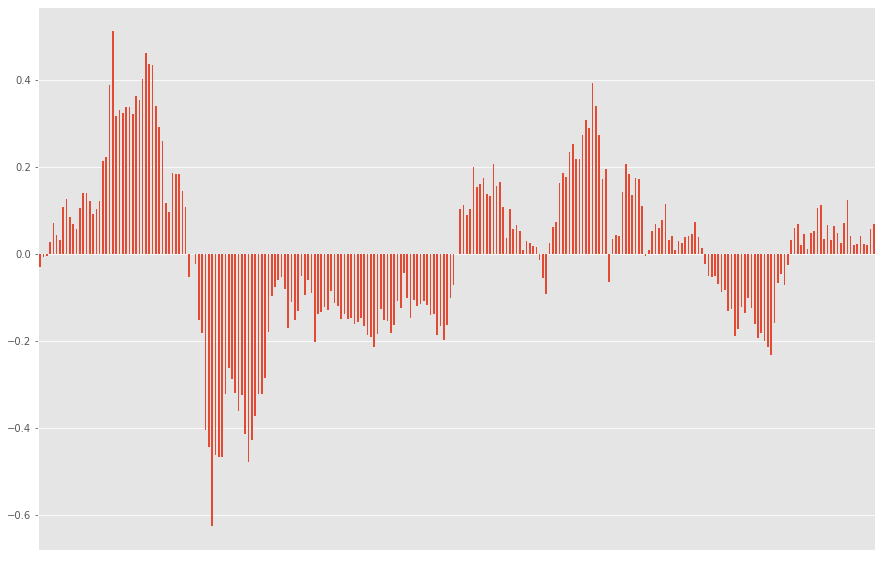

In [72]:
model_linear.resid.plot(kind = "bar").get_xaxis().set_visible(False)

In [73]:
model_linear_forecast_auto = model_linear.predict(exog = pd.DataFrame(dict(timeIndex=252), index=[0]))
model_linear_forecast_auto

0    5.874588
dtype: float64

In [78]:
tesla.drop('pricelinear',axis=1, inplace =True)

In [79]:
tesla['price_explin'] = np.exp(model_linear_pred)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin
Date,,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843,88.751706
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354,89.242157
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886,90.729833
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397,91.231216
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908,91.735369


<AxesSubplot:xlabel='timeIndex'>

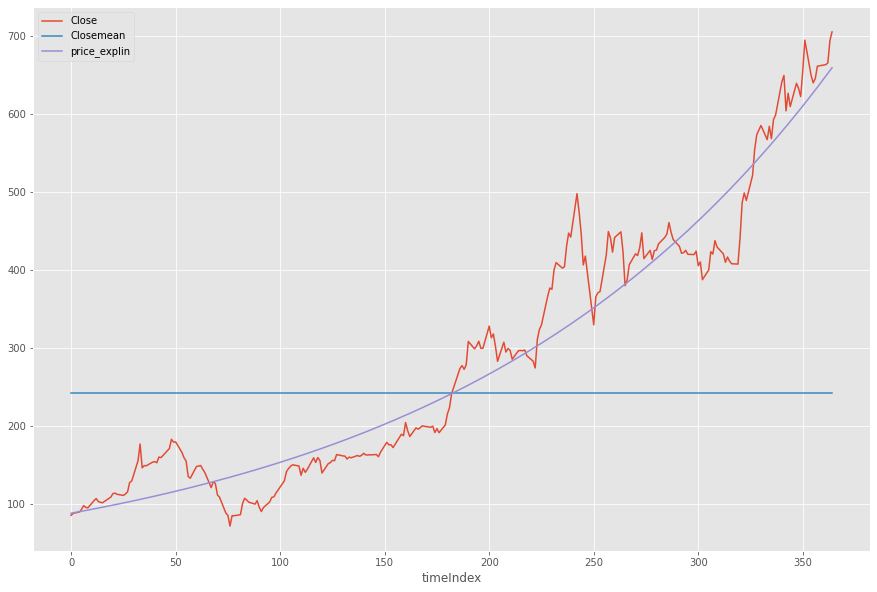

In [80]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "price_explin"])

In [81]:
tesla["CloselogShift1"] = tesla.Closelog.shift()
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin,CloselogShift1
Date,,,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843,88.751706,NaN
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354,89.242157,4.454952
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886,90.729833,4.484154
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397,91.231216,4.503226
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908,91.735369,4.541293


<AxesSubplot:xlabel='CloselogShift1', ylabel='Closelog'>

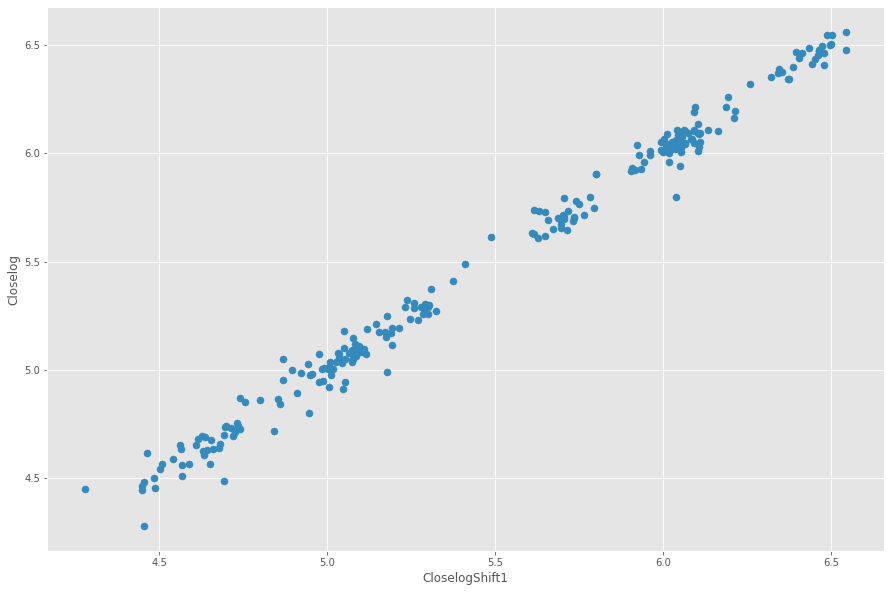

In [82]:
tesla.plot(kind= "scatter", y = "Closelog", x = "CloselogShift1", s = 50)

<AxesSubplot:xlabel='Date'>

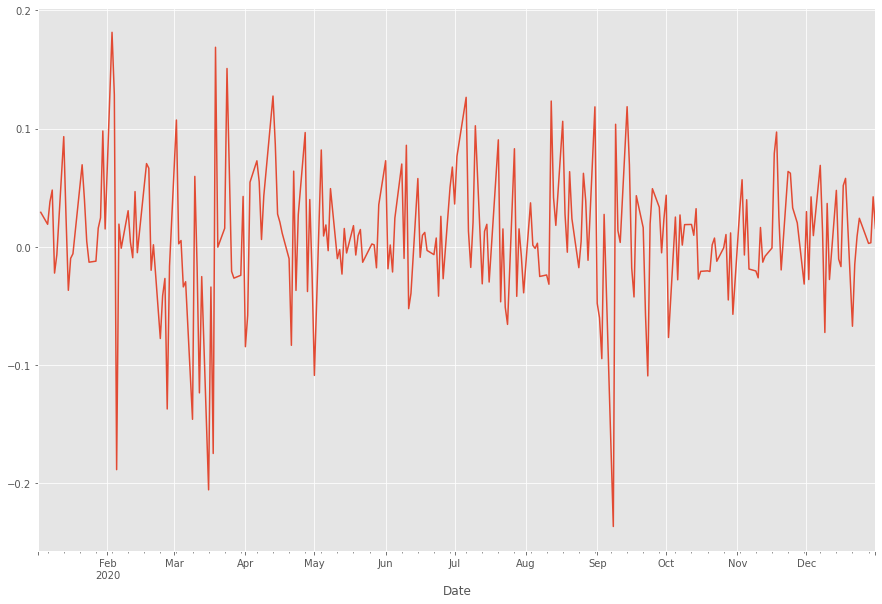

In [83]:
tesla["CloselogDiff"] = tesla.Closelog - tesla.CloselogShift1
tesla.CloselogDiff.plot()

In [84]:
tesla["CloseRandom"] = np.exp(tesla.CloselogShift1)
tesla.head()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin,CloselogShift1,CloselogDiff,CloseRandom
Date,,,,,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843,88.751706,NaN,NaN,NaN
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354,89.242157,4.454952,0.029203,86.052002
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886,90.729833,4.484154,0.019072,88.601997
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397,91.231216,4.503226,0.038067,90.307999
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908,91.735369,4.541293,0.048033,93.811996


In [90]:
def adf(ts):
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()

    orig = plt.plot(ts.values, color='blue',label='Original')
    mean = plt.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolstd.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

<AxesSubplot:xlabel='Date'>

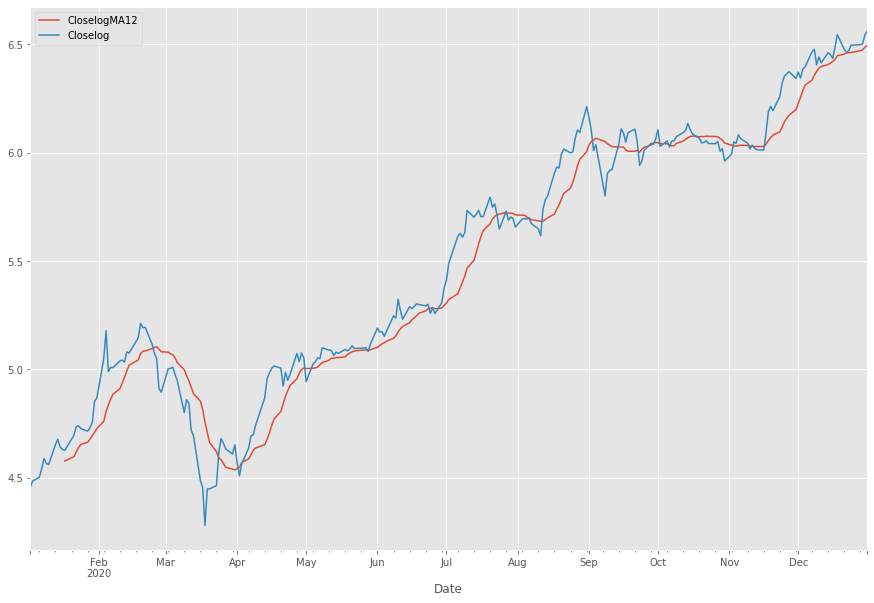

In [91]:
tesla['CloselogMA12'] = tesla.Closelog.rolling(12).mean()
tesla.plot(kind ="line", y=["CloselogMA12", "Closelog"])

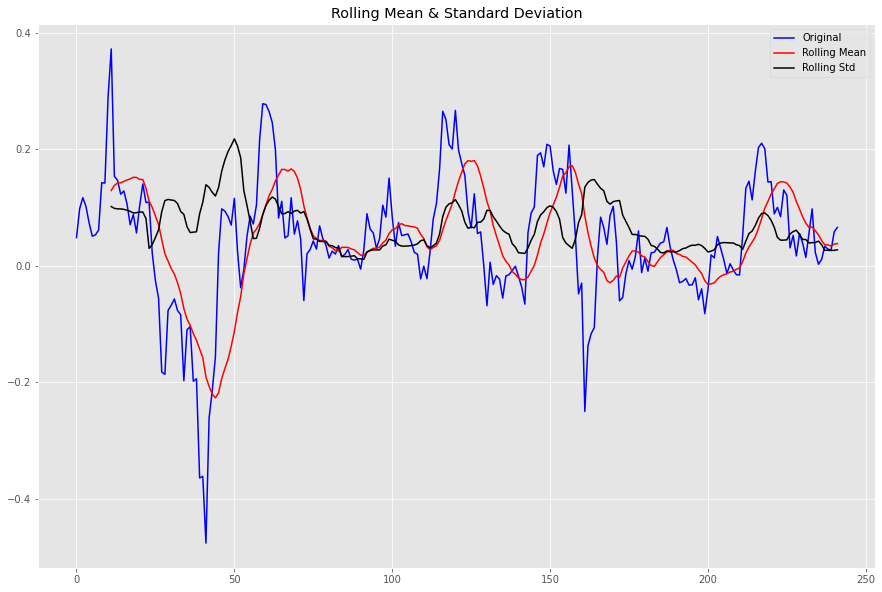

Test Statistic                  -4.877833
p-value                          0.000039
# of Lags Used                   3.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64

In [92]:
ts = tesla.Closelog - tesla.CloselogMA12
ts.dropna(inplace = True)
adf(ts)

if test statistic < critical value (any), we can assume this data is stationary.

In [109]:
span =7
tesla['CloselogExp12'] = tesla.Closelog.ewm(span=span).mean()
2/(span+1)

0.25

In [110]:
tesla

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin,CloselogShift1,CloselogDiff,CloseRandom,CloselogMA12,CloselogExp12
Date,,,,,,,,,,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,4.454952,242.680088,17.503449,0,4.485843,88.751706,NaN,NaN,NaN,NaN,4.454952
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,4.484154,242.680088,19.666097,1,4.491354,89.242157,4.454952,0.029203,86.052002,NaN,4.471639
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,4.503226,242.680088,21.828744,4,4.507886,90.729833,4.484154,0.019072,88.601997,NaN,4.485298
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,4.541293,242.680088,23.991392,5,4.513397,91.231216,4.503226,0.038067,90.307999,NaN,4.505776
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,4.589325,242.680088,26.154040,6,4.518908,91.735369,4.541293,0.048033,93.811996,NaN,4.533162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,642.989990,666.090027,641.000000,661.770020,6.494918,242.680088,553.840094,357,6.453232,634.750245,6.470769,0.024150,645.979980,6.461623,6.476032
2020-12-28,2020-12-28,674.510010,681.400024,660.799988,663.690002,6.497815,242.680088,556.002742,361,6.475275,648.897767,6.494918,0.002897,661.770020,6.469410,6.481478
2020-12-29,2020-12-29,661.000000,669.900024,655.000000,665.989990,6.501275,242.680088,558.165389,362,6.480786,652.483645,6.497815,0.003459,663.690002,6.474428,6.486427


<AxesSubplot:xlabel='Date'>

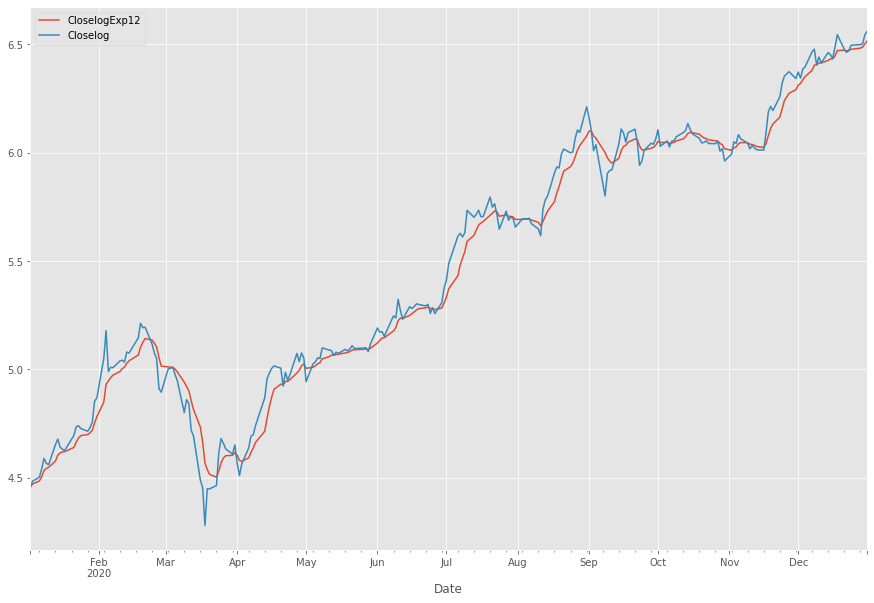

In [111]:
tesla.plot(kind ="line", y=["CloselogExp12", "Closelog"])

In [112]:
tesla["CloseExp12"] = np.exp(tesla.CloselogExp12)
tesla.tail()

,Date,Open,High,Low,Close,Closelog,Closemean,linear,timeIndex,linear_stats,price_explin,CloselogShift1,CloselogDiff,CloseRandom,CloselogMA12,CloselogExp12,CloseExp12
Date,,,,,,,,,,,,,,,,,
2020-12-24,2020-12-24,642.98999,666.090027,641.000000,661.770020,6.494918,242.680088,553.840094,357,6.453232,634.750245,6.470769,0.024150,645.979980,6.461623,6.476032,649.389175
2020-12-28,2020-12-28,674.51001,681.400024,660.799988,663.690002,6.497815,242.680088,556.002742,361,6.475275,648.897767,6.494918,0.002897,661.770020,6.469410,6.481478,652.935230
2020-12-29,2020-12-29,661.00000,669.900024,655.000000,665.989990,6.501275,242.680088,558.165389,362,6.480786,652.483645,6.497815,0.003459,663.690002,6.474428,6.486427,656.174732
2020-12-30,2020-12-30,672.00000,696.599976,668.359985,694.780029,6.543595,242.680088,560.328037,363,6.486297,656.089339,6.501275,0.042321,665.989990,6.485274,6.500719,665.620146
2020-12-31,2020-12-31,699.98999,718.719971,691.119995,705.669983,6.559148,242.680088,562.490685,364,6.491808,659.714959,6.543595,0.015552,694.780029,6.493437,6.515326,675.414305


<AxesSubplot:xlabel='timeIndex'>

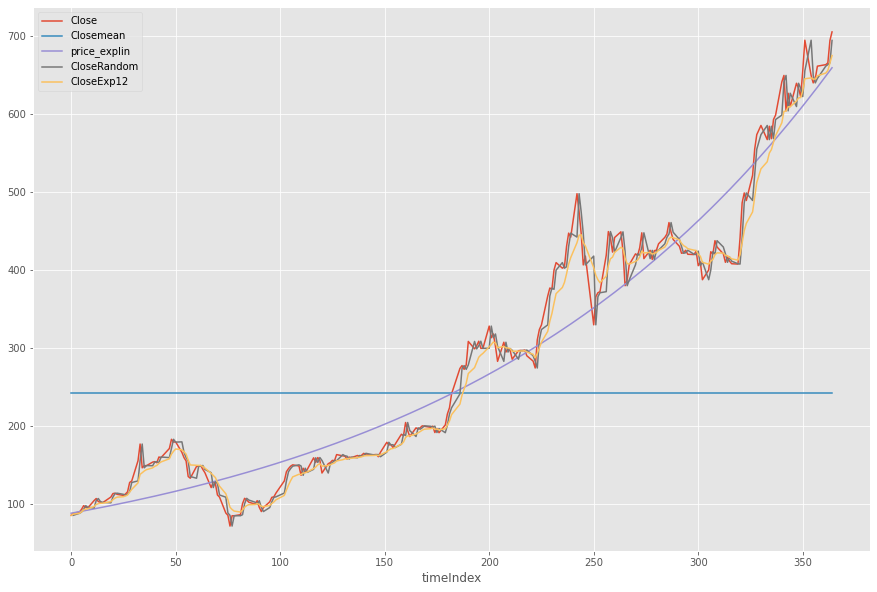

In [114]:
tesla.plot(kind="line", x="timeIndex", y = ["Close", "Closemean", "price_explin", 
                                             "CloseRandom", "CloseExp12"])

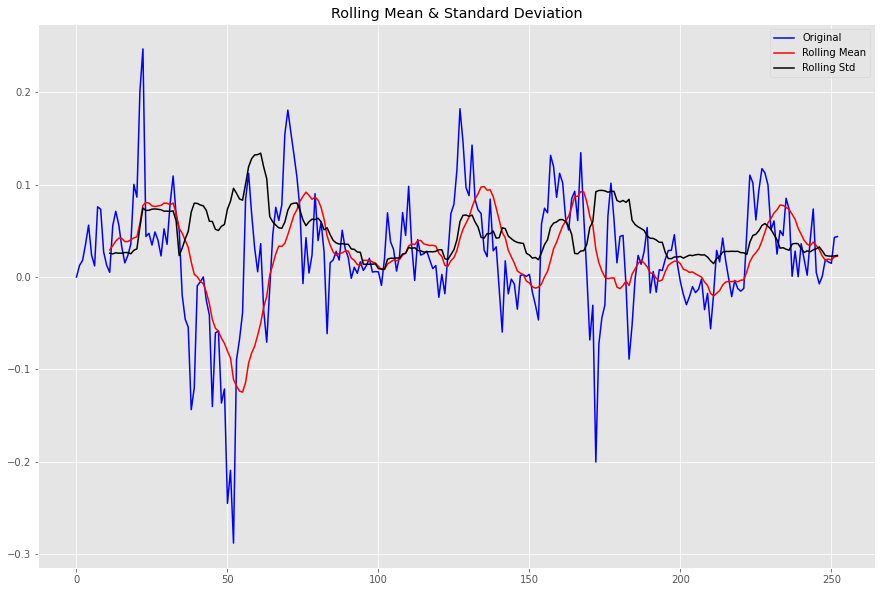

Test Statistic                -5.804581e+00
p-value                        4.547819e-07
# of Lags Used                 0.000000e+00
Number of Observations Used    2.520000e+02
Critical Value (1%)           -3.456569e+00
Critical Value (5%)           -2.873079e+00
Critical Value (10%)          -2.572919e+00
dtype: float64

In [115]:
ts = tesla.Closelog - tesla.CloselogExp12
ts.dropna(inplace = True)
adf(ts)

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose

tesla.reset_index(drop=True,inplace=True)


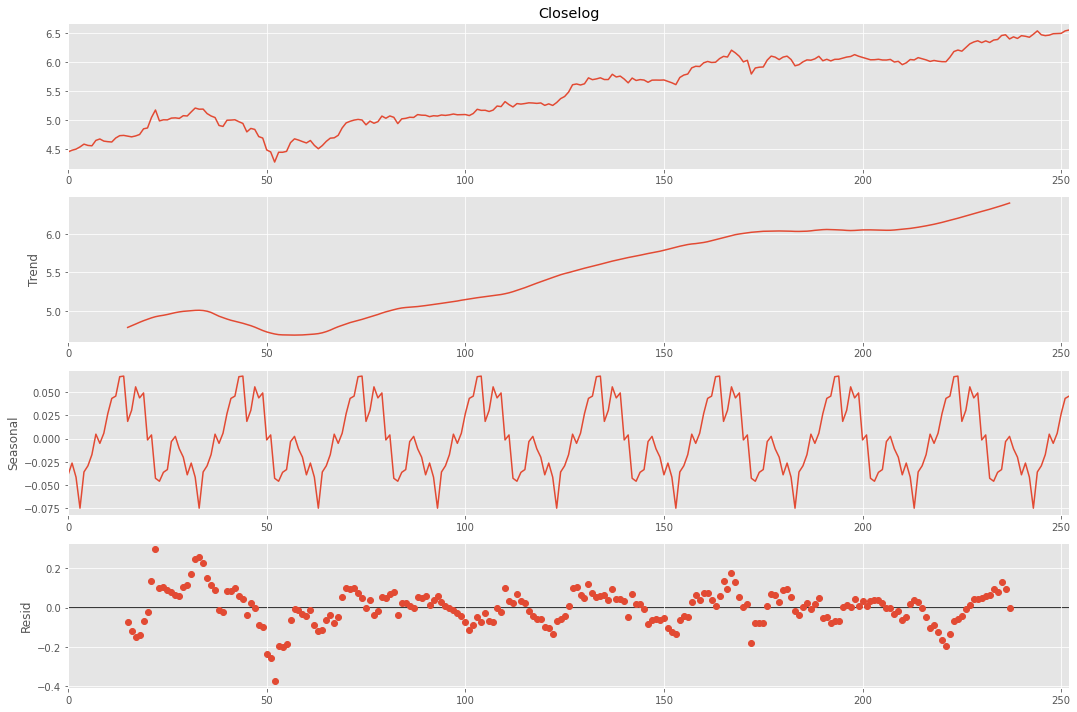

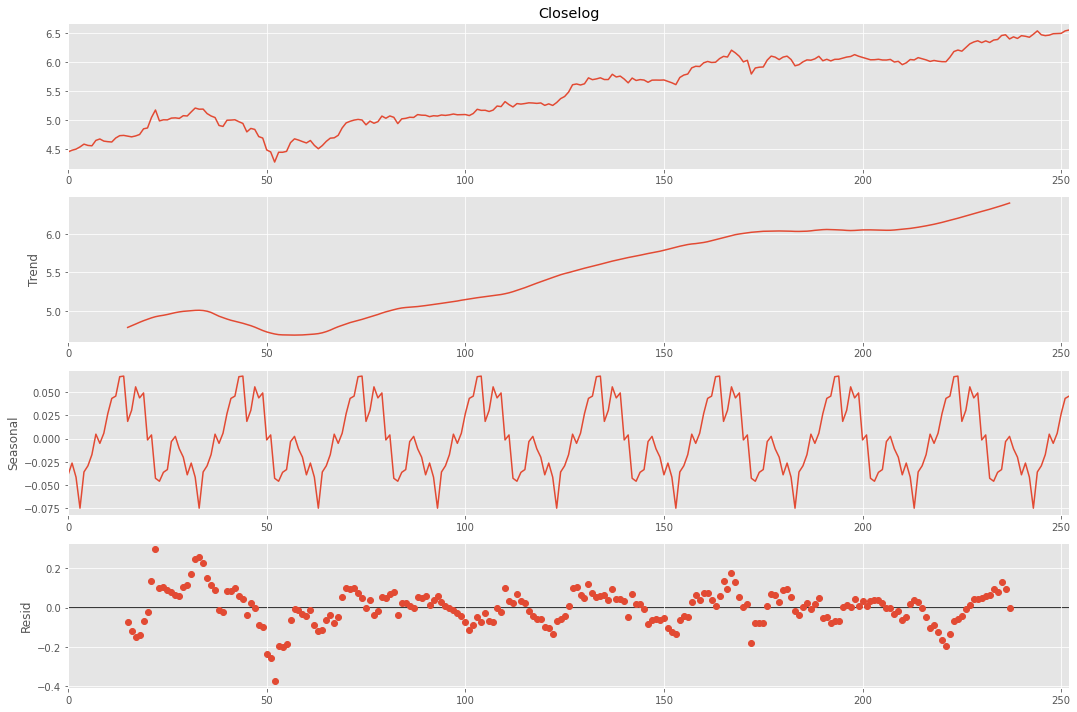

In [174]:
decomposition = seasonal_decompose(tesla.Closelog,period=30)
decomposition.plot()

In [175]:
ts = tesla.Closelog
ts_diff = tesla.CloselogDiff
ts_diff.dropna(inplace = True)

In [176]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)

c:\users\juntao\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [177]:
ACF = pd.Series(lag_acf)

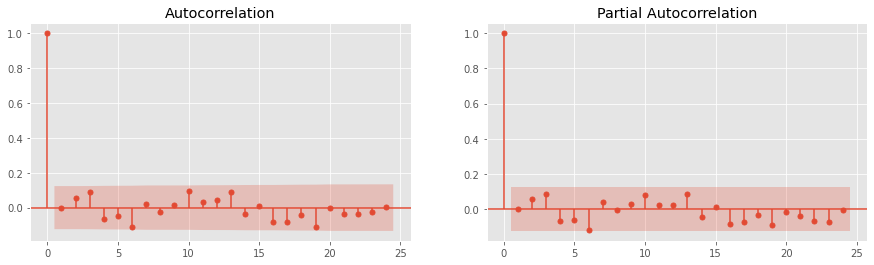

In [181]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(ts_diff, lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(ts_diff, lags=24, ax=axes[1])

### Conclusion
There is no significant autoregressive and moving average part. The exponential growth trend dominant everything.